In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv("1) iris.csv")

In [4]:
if 'species' in df.columns:
    X = df.drop(columns=['species']) 
else:
    X = df.copy()

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

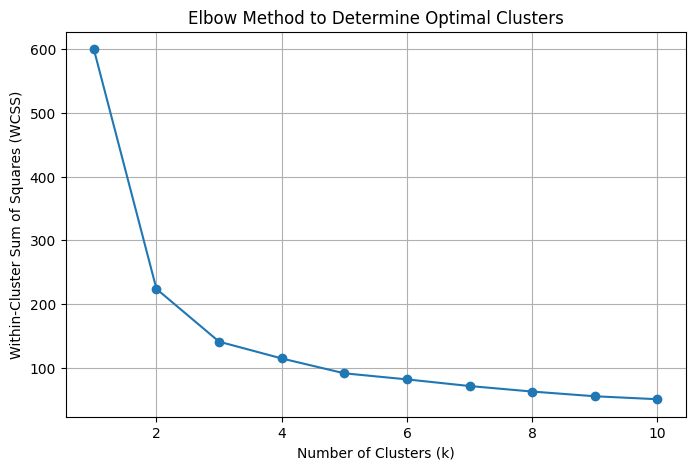

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


In [15]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [17]:
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = y_kmeans

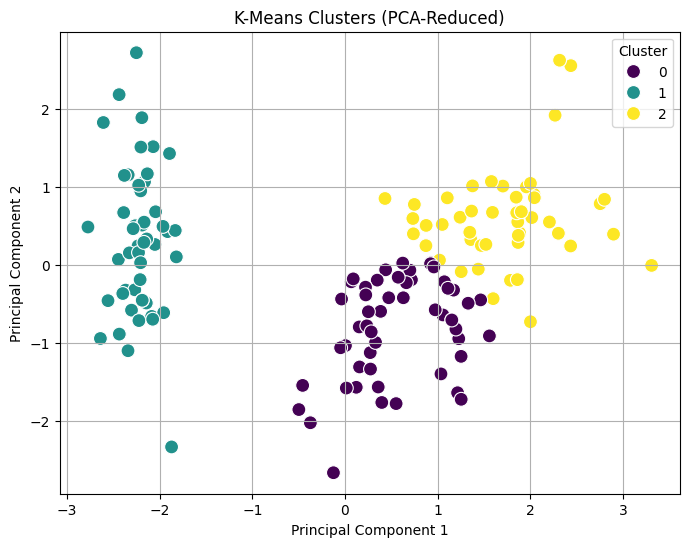

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title("K-Means Clusters (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [19]:
print("Cluster-wise feature means:")
print(df.groupby('Cluster').mean(numeric_only=True))

Cluster-wise feature means:
         sepal_length  sepal_width  petal_length  petal_width
Cluster                                                      
0            5.801887     2.673585      4.369811     1.413208
1            5.006000     3.418000      1.464000     0.244000
2            6.780851     3.095745      5.510638     1.972340
